In [1]:
from google.colab import drive
drive.mount('/content/drive')






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/projects/toxicity-multiclass


/content/drive/MyDrive/projects/toxicity-multiclass


In [3]:
!ls

chapters  models     pyproject.toml  results  src
data	  notebooks  README.md	     scripts


In [4]:
!pip install rdkit


In [5]:
!pip install  pandas numpy requests tqdm matplotlib seaborn


In [6]:

import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


This script imports the data preparation function and executes it to download and load the Tox21 dataset, returning the training, validation, and test sets

In [7]:

import sys
sys.path.insert(0, '.')

from src.toxicity.data.download import download_and_prepare_tox21

print("Downloading Tox21 dataset from MoleculeNet \n")

train_df, val_df, test_df = download_and_prepare_tox21(
    output_dir="data/raw",
    download_fresh=False
)

In [8]:

print("Raw Data Overview\n")
print(f"Training set:   {len(train_df):,} molecules")
print(f"Validation set: {len(val_df):,} molecules")
print(f"Test set:       {len(test_df):,} molecules")

print(f"\nColumns: {list(train_df.columns)}")

print(f"\nFirst 3 molecules:")
display(train_df.head(3))

Raw Data Overview

Training set:   6,264 molecules
Validation set: 783 molecules
Test set:       784 molecules

Columns: ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53', 'mol_id', 'smiles']

First 3 molecules:


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX667,NCC(=O)O
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX24624,C=CC(=O)OCCCCCCCC
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6726,CC(C)=CCCC(C)CCO


In [9]:

assays = [col for col in train_df.columns if col not in ['mol_id', 'smiles']]

print(f"Tox21 Assays ({len(assays)} total):\n")
for i, assay in enumerate(assays, 1):
    print(f"{i:2d}. {assay}")

Tox21 Assays (12 total):

 1. NR-AR
 2. NR-AR-LBD
 3. NR-AhR
 4. NR-Aromatase
 5. NR-ER
 6. NR-ER-LBD
 7. NR-PPAR-gamma
 8. SR-ARE
 9. SR-ATAD5
10. SR-HSE
11. SR-MMP
12. SR-p53


In [10]:
# class distribution analysis

stats = []
for assay in assays:
    valid = train_df[assay].dropna()
    if len(valid) > 0:
        positive_rate = (valid == 1).sum() / len(valid) * 100
        missing_rate = train_df[assay].isna().sum() / len(train_df) * 100

        stats.append({
            'Assay': assay,
            'Positive %': positive_rate,
            'Missing %': missing_rate,
            'N Valid': len(valid)
        })

stats_df = pd.DataFrame(stats)
display(stats_df)

print(f"   Average positive rate: {stats_df['Positive %'].mean():.1f}%")

,Assay,Positive %,Missing %,N Valid
0,NR-AR,4.409991,7.327586,5805
1,NR-AR-LBD,3.520737,13.393997,5425
2,NR-AhR,11.705175,16.395275,5237
3,NR-Aromatase,4.953032,25.223499,4684
4,NR-ER,12.369057,20.753512,4964
5,NR-ER-LBD,4.759339,11.111111,5568
6,NR-PPAR-gamma,2.671830,17.544700,5165
7,SR-ARE,16.030697,25.111750,4691
8,SR-ATAD5,3.531697,9.594508,5663
9,SR-HSE,5.739130,17.385057,5175


   Average positive rate: 7.6%


this means most molecules are non-toxic

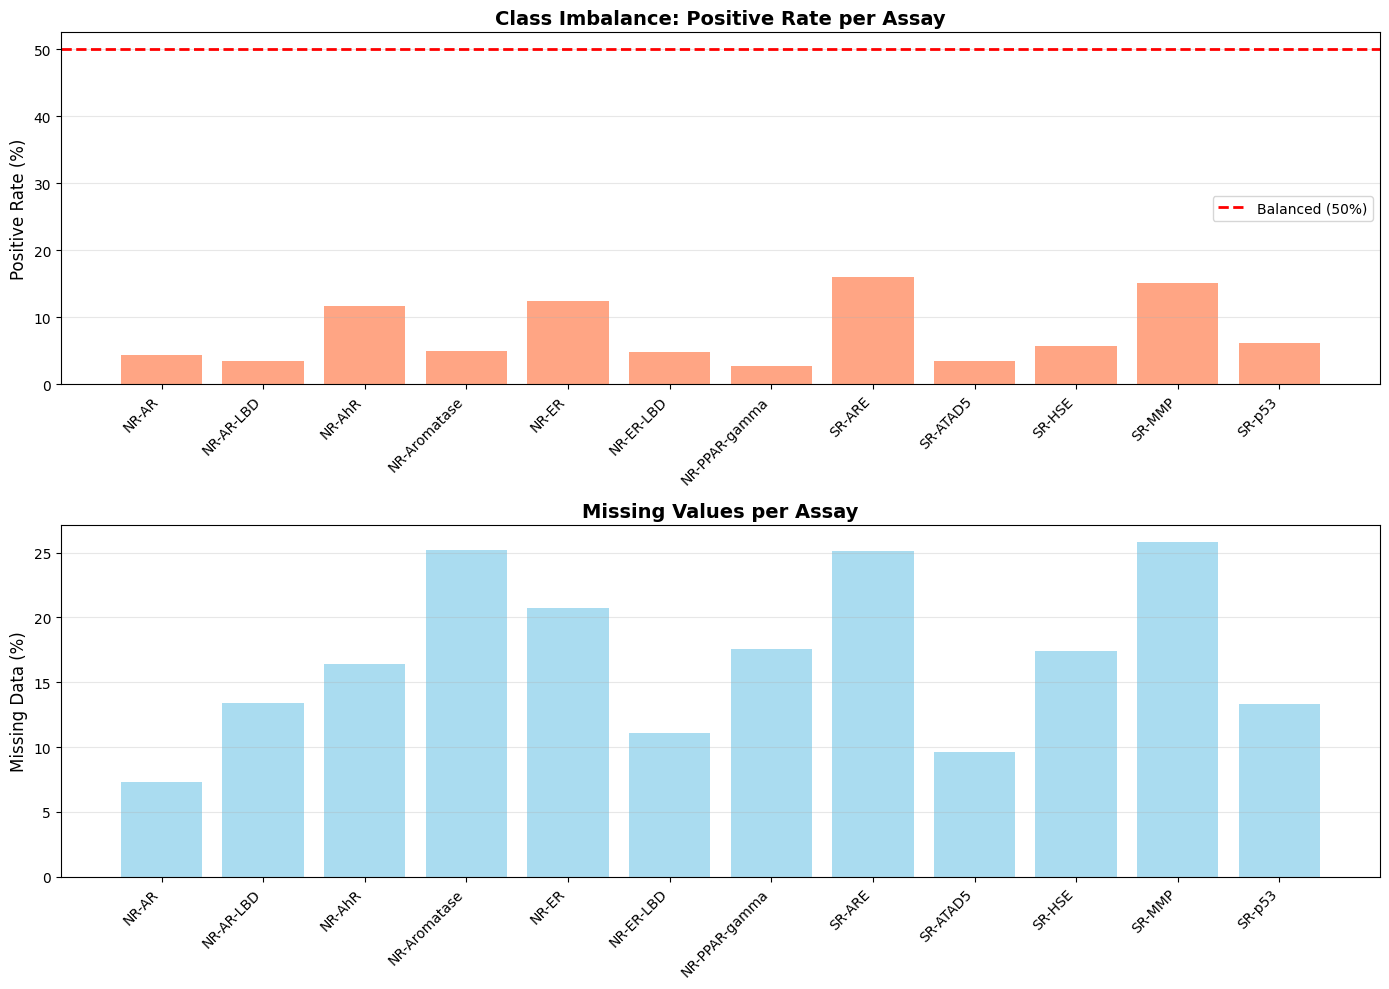

 Saved: results/figures/data_overview.png


In [11]:
# class distribution plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Positive rates
axes[0].bar(range(len(assays)), stats_df['Positive %'], color='coral', alpha=0.7)
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=2, label='Balanced (50%)')
axes[0].set_xticks(range(len(assays)))
axes[0].set_xticklabels(assays, rotation=45, ha='right')
axes[0].set_ylabel('Positive Rate (%)', fontsize=12)
axes[0].set_title('Class Imbalance: Positive Rate per Assay', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Missing data
axes[1].bar(range(len(assays)), stats_df['Missing %'], color='skyblue', alpha=0.7)
axes[1].set_xticks(range(len(assays)))
axes[1].set_xticklabels(assays, rotation=45, ha='right')
axes[1].set_ylabel('Missing Data (%)', fontsize=12)
axes[1].set_title('Missing Values per Assay', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/figures/data_overview.png', dpi=150, bbox_inches='tight')
plt.show()

print(" Saved: results/figures/data_overview.png")

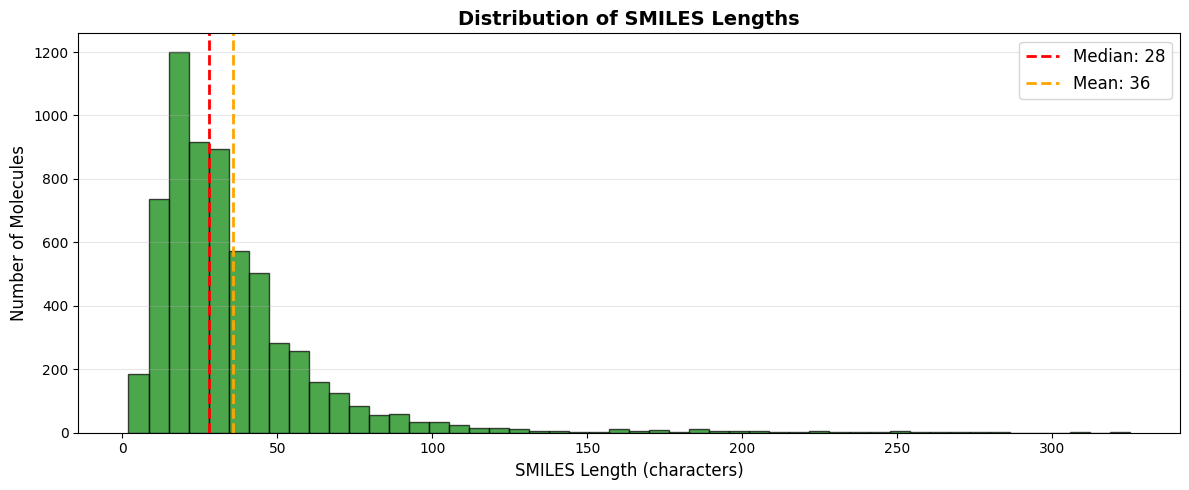


 SMILES Length Statistics:
   Mean:   35.6
   Median: 28.0
   Min:    2
   Max:    325
 bigger than 150:    88


In [12]:
# SMILES length distribution
train_df['smiles_length'] = train_df['smiles'].str.len()

fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(train_df['smiles_length'], bins=50, color='green', alpha=0.7, edgecolor='black')
ax.axvline(train_df['smiles_length'].median(), color='red', linestyle='--',
           linewidth=2, label=f"Median: {train_df['smiles_length'].median():.0f}")
ax.axvline(train_df['smiles_length'].mean(), color='orange', linestyle='--',
           linewidth=2, label=f"Mean: {train_df['smiles_length'].mean():.0f}")
ax.set_xlabel('SMILES Length (characters)', fontsize=12)
ax.set_ylabel('Number of Molecules', fontsize=12)
ax.set_title('Distribution of SMILES Lengths', fontsize=14, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('results/figures/smiles_lengths.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n SMILES Length Statistics:")
print(f"   Mean:   {train_df['smiles_length'].mean():.1f}")
print(f"   Median: {train_df['smiles_length'].median():.1f}")
print(f"   Min:    {train_df['smiles_length'].min()}")
print(f"   Max:    {train_df['smiles_length'].max()}")
count_over_150 = (train_df['smiles_length'] > 150).sum()
print(f" bigger than 150:    {count_over_150}")



In [13]:
from src.toxicity.data.cleaning import clean_dataframe

# validate SMILES syntax
#remove salts and counterions
#canonicalize (standardize representation)
#filter by size (3-150 heavy atoms)
#remove duplicates


In [14]:
# cleaning training data
print("\n CLEANING TEST DATA")
train_clean, train_stats = clean_dataframe(
    train_df,
    smiles_col='smiles',
    canonicalize=True,
    remove_salt=True,
    min_atoms=3,
    max_atoms=150,
    show_progress=True
)


 CLEANING TEST DATA


Cleaning molecules: 100%|██████████| 6264/6264 [00:13<00:00, 472.39it/s]


 Cleaning Summary:
   Original molecules:    6,264
   Failed cleaning:    29 (0.46%)
   Duplicates removed: 73 (1.17%)
   Final clean data:   6,162 (98.37%)

   Failure breakdown:
 size check failed: too small: 22
 validation failed: invalid smile: 7


In [15]:
# cleaning validation data
print("\n CLEANING VALIDATION DATA")

val_clean, val_stats = clean_dataframe(
    val_df,
    smiles_col='smiles',
    canonicalize=True,
    remove_salt=True,
    min_atoms=3,
    max_atoms=150,
    show_progress=True
)


 CLEANING VALIDATION DATA


Cleaning molecules: 100%|██████████| 783/783 [00:01<00:00, 572.14it/s]


 Cleaning Summary:
   Original molecules:    783
   Failed cleaning:    5 (0.64%)
   Duplicates removed: 1 (0.13%)
   Final clean data:   777 (99.23%)

   Failure breakdown:
 size check failed: too small: 5


In [16]:
# Clean test data
print("\n CLEANING TEST DATA")

test_clean, test_stats = clean_dataframe(
    test_df,
    smiles_col='smiles',
    canonicalize=True,
    remove_salt=True,
    min_atoms=3,
    max_atoms=150,
    show_progress=True
)


 CLEANING TEST DATA


Cleaning molecules: 100%|██████████| 784/784 [00:01<00:00, 570.74it/s]


 Cleaning Summary:
   Original molecules:    784
   Failed cleaning:    5 (0.64%)
   Duplicates removed: 1 (0.13%)
   Final clean data:   778 (99.23%)

   Failure breakdown:
 size check failed: too small: 4
 validation failed: invalid smile: 1


In [17]:
# Save cleaned data
print("\n SAVING CLEANED DATA")

train_clean.to_csv('data/processed/train_clean.csv', index=False)
val_clean.to_csv('data/processed/val_clean.csv', index=False)
test_clean.to_csv('data/processed/test_clean.csv', index=False)

# Save statistics
import json
cleaning_stats = {
    'train': train_stats,
    'val': val_stats,
    'test': test_stats
}

with open('results/stats/cleaning_stats.json', 'w') as f:
    json.dump(cleaning_stats, f, indent=2)

print("Saved: ")
print("   data/processed/train_clean.csv")
print("   data/processed/val_clean.csv")
print("   data/processed/test_clean.csv")
print("   results/stats/cleaning_stats.json")


 SAVING CLEANED DATA
Saved: 
   data/processed/train_clean.csv
   data/processed/val_clean.csv
   data/processed/test_clean.csv
   results/stats/cleaning_stats.json
